In [5]:
Import thư viện & load dữ liệu


SyntaxError: invalid syntax (1886915710.py, line 1)

In [6]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas'

In [7]:
df = pd.read_csv(
    r"C:\Users\Duong\OneDrive - Dai Nam University\Desktop\Data\shopping_cart_advanced_analysis\data\raw\online_retail.csv"
)

df.head()


NameError: name 'pd' is not defined

1. Làm sạch dữ liệu

In [ ]:
# Bỏ dòng thiếu
df = df.dropna(subset=['InvoiceNo', 'Description'])

# Bỏ đơn bị huỷ (Invoice bắt đầu bằng 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Chỉ giữ số lượng & giá hợp lệ
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.shape


(530104, 8)

2. Tính TRỌNG SỐ giao dịch (InvoiceValue)

In [ ]:
df['InvoiceValue'] = df['Quantity'] * df['UnitPrice']

invoice_value = (
    df.groupby('InvoiceNo')['InvoiceValue']
    .sum()
    .reset_index()
)

invoice_value.head()


,InvoiceNo,InvoiceValue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


3. Chuẩn bị basket_bool

In [ ]:
basket = (
    df.groupby(['InvoiceNo', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)

basket_bool = basket.applymap(lambda x: 1 if x > 0 else 0)

basket_bool.head()


C:\Users\Duong\AppData\Local\Temp\ipykernel_8084\1814792312.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_bool = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4. Khai phá FP-Growth (luật thường)

In [ ]:
frequent_itemsets = fpgrowth(
    basket_bool,
    min_support=0.01,
    use_colnames=True
)

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3
)

rules = rules[rules['lift'] > 1]

rules.head()


c:\Users\Duong\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(HAND WARMER OWL DESIGN),(HAND WARMER UNION JACK),0.032766,0.023998,0.011824,0.360856,15.036933,0.011037,1.527046,0.965120
1,(HAND WARMER UNION JACK),(HAND WARMER OWL DESIGN),0.023998,0.032766,0.011824,0.492693,15.036933,0.011037,1.906606,0.956450
2,(HAND WARMER UNION JACK),(HAND WARMER SCOTTY DOG DESIGN),0.023998,0.027455,0.010772,0.448852,16.348689,0.010113,1.764580,0.961917
3,(HAND WARMER SCOTTY DOG DESIGN),(HAND WARMER UNION JACK),0.027455,0.023998,0.010772,0.392336,16.348689,0.010113,1.606153,0.965336
4,(HOME BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.038928,0.113026,0.012776,0.328185,2.903626,0.008376,1.320266,0.682158


5. TÍNH WEIGHTED SUPPORT

Tổng giá trị toàn bộ hoá đơn

In [ ]:
total_invoice_value = invoice_value['InvoiceValue'].sum()


Hàm tính weighted support cho 1 luật

In [ ]:
def weighted_support(rule_items):
    invoices = (
        df[df['Description'].isin(rule_items)]
        .groupby('InvoiceNo')
        .filter(lambda x: set(rule_items).issubset(set(x['Description'])))
        ['InvoiceNo']
        .unique()
    )

    value = invoice_value[
        invoice_value['InvoiceNo'].isin(invoices)
    ]['InvoiceValue'].sum()

    return value / total_invoice_value


Áp dụng cho toàn bộ luật

In [ ]:
rules['weighted_support'] = rules.apply(
    lambda r: weighted_support(
        set(r['antecedents']).union(set(r['consequents']))
    ),
    axis=1
)


6. XÂY DỰNG 2 BẢNG XẾP HẠNG LUẬT

Bảng 1: Luật mạnh theo Support & Lift

In [ ]:
rules_freq = rules.sort_values(
    ['support', 'lift'],
    ascending=False
).head(10)

rules_freq[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
54,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.041333,0.394926,6.471855
55,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.041333,0.677340,6.471855
832,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.038427,0.720188,14.190472
831,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.038427,0.757157,14.190472
61,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.036273,0.346577,5.842638
62,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.036273,0.611486,5.842638
334,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.034068,0.325515,5.529593
335,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.034068,0.578723,5.529593
631,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.032114,0.503535,6.426188
632,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.032114,0.409847,6.426188


Bảng 2: Luật mạnh theo Weighted Support

In [ ]:
rules_weighted = rules.sort_values(
    ['weighted_support', 'lift'],
    ascending=False
).head(10)

rules_weighted[['antecedents', 'consequents', 'weighted_support', 'lift']]


,antecedents,consequents,weighted_support,lift
832,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.111735,14.190472
831,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.111735,14.190472
1015,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.095564,11.725388
1016,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.095564,11.725388
1017,(WOODLAND CHARLOTTE BAG),(CHARLOTTE BAG SUKI DESIGN),0.092740,12.388302
1018,(CHARLOTTE BAG SUKI DESIGN),(WOODLAND CHARLOTTE BAG),0.092740,12.388302
54,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.091507,6.471855
55,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.091507,6.471855
726,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.090993,14.037229
727,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.090993,14.037229


7. PHÂN LOẠI LUẬT

In [ ]:
def classify_rule(row):
    if row['support'] > 0.02 and row['weighted_support'] > 0.02:
        return "Phổ biến & Giá trị cao"
    elif row['support'] < 0.01 and row['weighted_support'] > 0.02:
        return "Ít gặp nhưng giá trị cao"
    else:
        return "Ít giá trị kinh doanh"

rules['rule_type'] = rules.apply(classify_rule, axis=1)

rules['rule_type'].value_counts()


rule_type
Ít giá trị kinh doanh     1673
Phổ biến & Giá trị cao     151
Name: count, dtype: int64

8. TRỰC QUAN HÓA

Biểu đồ 1: Scatter – Support vs Confidence

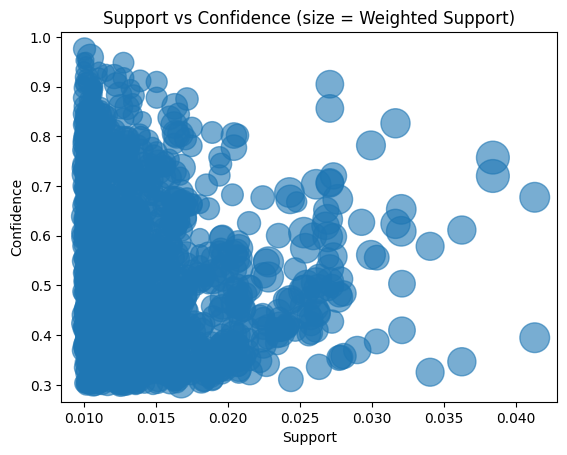

In [ ]:
plt.figure()
plt.scatter(
    rules['support'],
    rules['confidence'],
    s=rules['weighted_support'] * 5000,
    alpha=0.6
)

plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence (size = Weighted Support)")
plt.show()


Biểu đồ 2: So sánh Top luật

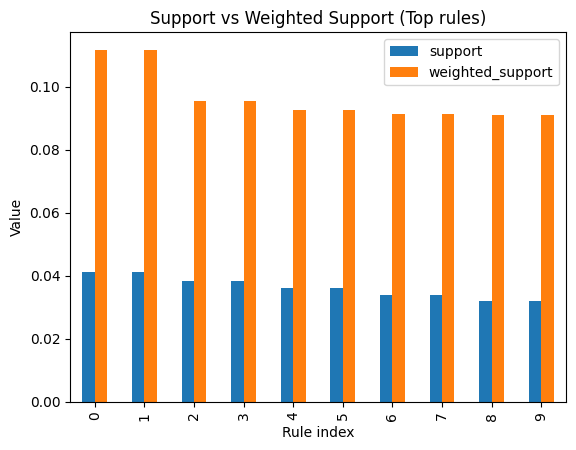

In [ ]:
top_compare = rules_freq[['support']].reset_index(drop=True)
top_compare['weighted_support'] = rules_weighted['weighted_support'].values

top_compare.plot(kind='bar')
plt.title("Support vs Weighted Support (Top rules)")
plt.xlabel("Rule index")
plt.ylabel("Value")
plt.show()


9. LƯU KẾT QUẢ

In [ ]:
import os

output_path = "shopping_cart_advanced_analysis/data/processed"
os.makedirs(output_path, exist_ok=True)

rules.to_csv(
    f"{output_path}/rules_fpgrowth_filtered.csv",
    index=False
)


In [1]:
import sys
import os

# Thêm đường dẫn để Notebook tìm thấy thư mục src
sys.path.append(os.path.abspath(os.path.join('..')))

from src.cluster_library import RuleBasedCustomerClusterer
import pandas as pd

# Khởi tạo đối tượng phân cụm
clusterer = RuleBasedCustomerClusterer()
print("Kết nối thư viện thành công!")

Kết nối thư viện thành công!


In [7]:

df_rules = pd.read_csv('../notebooks/shopping_cart_advanced_analysis/data/processed/rules_fpgrowth_filtered.csv')


top_rules = clusterer.load_rules(df_rules, top_k=20, sort_by='lift')
print(top_rules.head())

                                           antecedents  \
822                   frozenset({'HERB MARKER THYME'})   
817  frozenset({'HERB MARKER PARSLEY', 'HERB MARKER...   
820                frozenset({'HERB MARKER ROSEMARY'})   
819  frozenset({'HERB MARKER PARSLEY', 'HERB MARKER...   
824  frozenset({'HERB MARKER BASIL', 'HERB MARKER T...   

                                           consequents  antecedent support  \
822  frozenset({'HERB MARKER PARSLEY', 'HERB MARKER...            0.011874   
817                   frozenset({'HERB MARKER THYME'})            0.010772   
820  frozenset({'HERB MARKER PARSLEY', 'HERB MARKER...            0.012024   
819                frozenset({'HERB MARKER ROSEMARY'})            0.010671   
824                frozenset({'HERB MARKER ROSEMARY'})            0.010521   

     consequent support  support  confidence       lift  leverage  conviction  \
822            0.010772  0.01017    0.856540  79.518791  0.010042    6.895504   
817            0.011

In [9]:
# Bạn cần tạo ma trận này từ dữ liệu giao dịch sạch (thường là cleaned_uk_data.csv)
df_clean = pd.read_csv('../data/processed/cleaned_uk_data.csv')

# Tạo ma trận Khách hàng x Sản phẩm (Binary)
customer_item_matrix = df_clean.groupby(['CustomerID', 'Description']).size().unstack(fill_value=0) > 0

/var/folders/tk/3yrv6xbs6nn_36d0y_7hvg9w0000gn/T/ipykernel_95392/4219068001.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('../data/processed/cleaned_uk_data.csv')
